### Childhood Autistic Spectrum Disorder Screening using Machine Learning

The early diagnosis of neurodevelopment disorders can improve treatment and significantly decrease the associated
healthcare costs. In this project, we will use supervised learning to diagnose Autistic Spectrum Disorder
(ASD) based on behavioural features and individual characteristics. More specifically, we will build and deploy a neural network using the Keras API.

This project will use a dataset provided by the UCI Machine Learning Repository that contains screening data for 292 patients. The dataset can be found at the following URL:
https://archive.ics.uci.edu/ml/datasets/Autistic+Spectrum+Disorder+Screening+Data+for+Children++


In [89]:
#importing libraries
import sys
import pandas as pd
import sklearn
import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


In [90]:
# import the dataset
file = 'age_4-11.txt'
# read the csv
data = pd.read_table(file, sep = ',', index_col = None)

In [91]:
data['ethnicity'].isnull().sum()

0

In [92]:
# print the shape of the DataFrame, so we can see how many examples we have
print(data.loc[0])

A1_Score                      1
A2_Score                      1
A3_Score                      0
A4_Score                      0
A5_Score                      1
A6_Score                      1
A7_Score                      0
A8_Score                      1
A9_Score                      0
A10_Score                     0
age                           6
gender                        m
ethnicity                Others
jundice                      no
austim                       no
contry_of_res            Jordan
used_app_before              no
result                        5
age_desc           '4-11 years'
relation                 Parent
Class                        NO
Name: 0, dtype: object


In [93]:
new={"jundice":'jaundice'}
df= data.rename(columns=new)

Text(0, 0.5, 'Frequency')

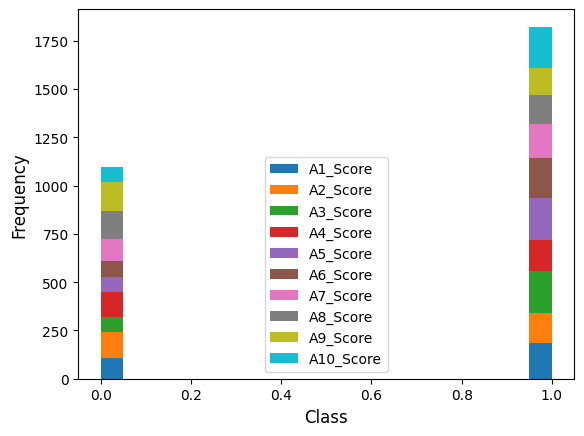

In [76]:

ax=data.plot.hist(stacked=True, bins=20);
ax.set_xlabel('Class',fontsize=12)
ax.set_ylabel('Frequency',fontsize=12)


In [95]:
# print out multiple patients at the same time
data.loc[:10]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5,'4-11 years',Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,'Middle Eastern ',no,no,Jordan,no,5,'4-11 years',Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5,'4-11 years',?,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4,'4-11 years',?,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,'United States',no,10,'4-11 years',Parent,YES
5,0,0,1,0,1,1,0,1,0,1,...,m,?,no,yes,Egypt,no,5,'4-11 years',?,NO
6,1,0,1,1,1,1,0,1,0,1,...,m,White-European,no,no,'United Kingdom',no,7,'4-11 years',Parent,YES
7,1,1,1,1,1,1,1,1,0,0,...,f,'Middle Eastern ',no,no,Bahrain,no,8,'4-11 years',Parent,YES
8,1,1,1,1,1,1,1,0,0,0,...,f,'Middle Eastern ',no,no,Bahrain,no,7,'4-11 years',Parent,YES
9,0,0,1,1,1,0,1,1,0,0,...,f,?,no,yes,Austria,no,5,'4-11 years',?,NO


In [57]:
data.isnull()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
288,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
289,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
290,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
# print out a description of the dataframe
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,result
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,0.633562,0.534247,0.743151,0.551370,0.743151,0.712329,0.606164,0.496575,0.493151,0.726027,6.239726
std,0.482658,0.499682,0.437646,0.498208,0.437646,0.453454,0.489438,0.500847,0.500811,0.446761,2.284882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [96]:
# drop unwanted columns
data = data.drop(['austim','contry_of_res','used_app_before','result','age_desc','relation'], axis=1)

In [98]:
data.loc[:10]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,Class
0,1,1,0,0,1,1,0,1,0,0,6,m,Others,no,NO
1,1,1,0,0,1,1,0,1,0,0,6,m,'Middle Eastern ',no,NO
2,1,1,0,0,0,1,1,1,0,0,6,m,?,no,NO
3,0,1,0,0,1,1,0,0,0,1,5,f,?,yes,NO
4,1,1,1,1,1,1,1,1,1,1,5,m,Others,yes,YES
5,0,0,1,0,1,1,0,1,0,1,4,m,?,no,NO
6,1,0,1,1,1,1,0,1,0,1,5,m,White-European,no,YES
7,1,1,1,1,1,1,1,1,0,0,5,f,'Middle Eastern ',no,YES
8,1,1,1,1,1,1,1,0,0,0,11,f,'Middle Eastern ',no,YES
9,0,0,1,1,1,0,1,1,0,0,11,f,?,no,NO


In [84]:
sns.heatmap(data, annot=True, cmap='viridis', fmt='d')

ValueError: could not convert string to float: '?'

In [60]:
# create X and Y datasets for training
x = data.drop(columns=['Class'])
y = data['Class']

In [61]:
x.loc[:10]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice
0,1,1,0,0,1,1,0,1,0,0,6,m,Others,no
1,1,1,0,0,1,1,0,1,0,0,6,m,'Middle Eastern ',no
2,1,1,0,0,0,1,1,1,0,0,6,m,?,no
3,0,1,0,0,1,1,0,0,0,1,5,f,?,yes
4,1,1,1,1,1,1,1,1,1,1,5,m,Others,yes
5,0,0,1,0,1,1,0,1,0,1,4,m,?,no
6,1,0,1,1,1,1,0,1,0,1,5,m,White-European,no
7,1,1,1,1,1,1,1,1,0,0,5,f,'Middle Eastern ',no
8,1,1,1,1,1,1,1,0,0,0,11,f,'Middle Eastern ',no
9,0,0,1,1,1,0,1,1,0,0,11,f,?,no


In [62]:
# convert the data to categorical values - one-hot-encoded vectors
X = pd.get_dummies(x)

In [63]:
# print the new categorical column labels
X.columns.values

array(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score',
       'age_10', 'age_11', 'age_4', 'age_5', 'age_6', 'age_7', 'age_8',
       'age_9', 'age_?', 'gender_f', 'gender_m',
       "ethnicity_'Middle Eastern '", "ethnicity_'South Asian'",
       'ethnicity_?', 'ethnicity_Asian', 'ethnicity_Black',
       'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Others',
       'ethnicity_Pasifika', 'ethnicity_Turkish',
       'ethnicity_White-European', 'jundice_no', 'jundice_yes'],
      dtype=object)

In [64]:
# print an example patient from the categorical data
X.loc[1]

A1_Score                       1
A2_Score                       1
A3_Score                       0
A4_Score                       0
A5_Score                       1
A6_Score                       1
A7_Score                       0
A8_Score                       1
A9_Score                       0
A10_Score                      0
age_10                         0
age_11                         0
age_4                          0
age_5                          0
age_6                          1
age_7                          0
age_8                          0
age_9                          0
age_?                          0
gender_f                       0
gender_m                       1
ethnicity_'Middle Eastern '    1
ethnicity_'South Asian'        0
ethnicity_?                    0
ethnicity_Asian                0
ethnicity_Black                0
ethnicity_Hispanic             0
ethnicity_Latino               0
ethnicity_Others               0
ethnicity_Pasifika             0
ethnicity_

In [65]:
# convert the class data to categorical values - one-hot-encoded vectors
Y = pd.get_dummies(y)

In [66]:
Y.iloc[:10]

,NO,YES
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,1,0


In [67]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(X)
vectorizer.vocabulary_

{'A1_Score': 1,
 'A2_Score': 2,
 'A3_Score': 3,
 'A4_Score': 4,
 'A5_Score': 5,
 'A6_Score': 6,
 'A7_Score': 7,
 'A8_Score': 8,
 'A9_Score': 9,
 'A10_Score': 0,
 'age_10': 16,
 'age_11': 17,
 'age_4': 18,
 'age_5': 19,
 'age_6': 20,
 'age_7': 21,
 'age_8': 22,
 'age_9': 23,
 'age_': 15,
 'gender_f': 33,
 'gender_m': 34,
 'ethnicity_': 24,
 'Middle': 13,
 'Eastern': 11,
 'South': 14,
 'Asian': 10,
 'ethnicity_Asian': 25,
 'ethnicity_Black': 26,
 'ethnicity_Hispanic': 27,
 'ethnicity_Latino': 28,
 'ethnicity_Others': 29,
 'ethnicity_Pasifika': 30,
 'ethnicity_Turkish': 31,
 'ethnicity_White': 32,
 'European': 12,
 'jundice_no': 35,
 'jundice_yes': 36}

In [68]:
vectorizer.transform(X).toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [69]:
data.isnull().sum()

A1_Score     0
A2_Score     0
A3_Score     0
A4_Score     0
A5_Score     0
A6_Score     0
A7_Score     0
A8_Score     0
A9_Score     0
A10_Score    0
age          0
gender       0
ethnicity    0
jundice      0
Class        0
dtype: int64

In [70]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
# split the X and Y data into training and testing dataset
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2,random_state=42)

### Building the Network - CNN


In [71]:
# build a neural network using Keras
input_dim = X_train.shape[1]
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Conv1D, GlobalMaxPool1D, Dense

# define a function to build the keras model

def create_model():
    # create model
    model = Sequential()
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(Conv1D(128, 5, activation='relu'))

    model.add(GlobalMaxPool1D())
    model.add(Dense(8, input_shape=(96, 1), kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='sigmoid'))



    # compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model
model = create_model()

In [72]:
#model.compile(loss='binary_crossentropy',
              #optimizer='adam',
              #metrics=['accuracy'])

model.build(input_shape=(None, 96, 1))


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 92, 128)           768       
                                                                 
 conv1d_7 (Conv1D)           (None, 88, 128)           82048     
                                                                 
 conv1d_8 (Conv1D)           (None, 84, 128)           82048     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 8)                 1032      
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                      

# Visualiztion of the CNN architecture

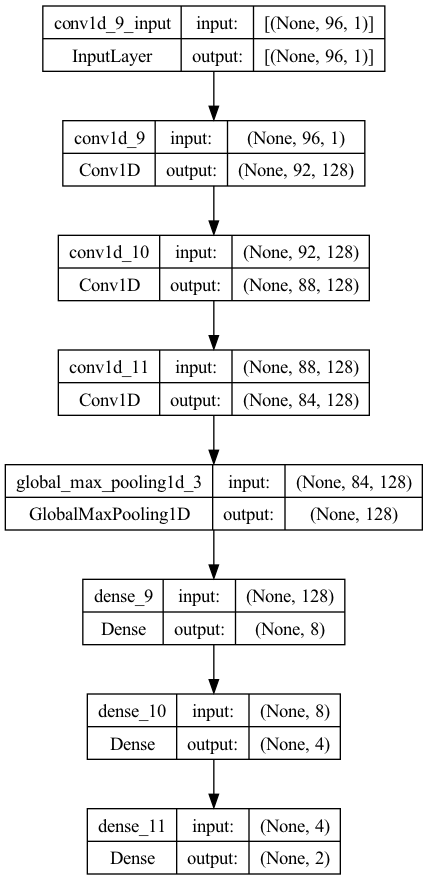

In [73]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

# Define your CNN model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(128, 5, activation='relu'))
model.add(tf.keras.layers.Conv1D(128, 5, activation='relu'))
model.add(tf.keras.layers.Conv1D(128, 5, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPool1D())
model.add(tf.keras.layers.Dense(8, input_shape=(96, 1), kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(4, kernel_initializer='normal', activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Compile the model
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Build the model
model.build(input_shape=(None, 96, 1))

# Visualize the model
plot_model(model, to_file='model_visualization.png', show_shapes=True)

### Training the Network
Training a Keras model is as simple as calling model.fit().

In [74]:
# fit the model
history=model.fit(X_train, Y_train, epochs=20, batch_size=10,validation_data=(X_test, Y_test), verbose = 1)

Epoch 1/20


2023-07-25 12:37:06.023795: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-07-25 12:37:06.182336: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x12685b150
2023-07-25 12:37:06.182364: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x12685b150
2023-07-25 12:37:06.187546: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x12685b150
2023-07-25 12:37:06.187563: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x12685b150
2023-07-25 12:37:06.189341: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOU

NotFoundError: Graph execution error:

Detected at node 'StatefulPartitionedCall_10' defined at (most recent call last):
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/traitlets/config/application.py", line 1043, in launch_instance
      app.start()
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 728, in start
      self.io_loop.start()
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 513, in dispatch_queue
      await self.process_one()
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 502, in process_one
      await dispatch(*args)
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 409, in dispatch_shell
      await result
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 423, in do_execute
      res = shell.run_cell(
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 540, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2945, in run_cell
      result = self._run_cell(
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3000, in _run_cell
      return runner(coro)
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3203, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3382, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3442, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/6f/n2krpnkx289d2x2f4d7k82yc0000gn/T/ipykernel_4957/3143727481.py", line 2, in <module>
      history=model.fit(X_train, Y_train, epochs=20, batch_size=10,validation_data=(X_test, Y_test), verbose = 1)
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 527, in minimize
      self.apply_gradients(grads_and_vars)
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1140, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 634, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1166, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1216, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/Users/shreyanmittal/.pyenv/versions/3.9.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1211, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'StatefulPartitionedCall_10'
could not find registered platform with id: 0x12685b150
	 [[{{node StatefulPartitionedCall_10}}]] [Op:__inference_train_function_3823]

In [ ]:
#generate classification report using predictions for categorical model

from sklearn.metrics import classification_report, accuracy_score

predictions = model.predict(X_test).round()
classes=np.argmax(predictions,axis=1)
predictions

In [ ]:
score = accuracy_score(Y_test,predictions)
score

In [ ]:
print('Results for Categorical Model')
print(accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

In [ ]:
loss, accuracy = model.evaluate(X_train, Y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

In [ ]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

In [ ]:
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])


# GRAPH PLOTTING FOR ACCURACY AND LOSS

In [ ]:

plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')



In [ ]:
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation '], loc='upper right')